# Домашнее задание 4

### Выполнил Штанько Константин, группа 4

Для начала нам необходимо получить таблицу c данными. Для начала обозначим `расшифровку` каждого столбца для понимания того, что мы анализируем. Давайте выведем ее на экран:

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


data = pd.read_excel('russian_regions.xlsx', sheet_name='Data')

desc = pd.read_excel('russian_regions.xlsx', sheet_name='Description of data')
print("Таблица 1. Описание данных")
print(desc.to_string(index=False))

Таблица 1. Описание данных
                      Переменная                                                                       Описание переменной
                 Q_OF_LIFE_INDEX                                                                    РЕЙТИНГ КАЧЕСТВА ЖИЗНИ
                  AVERAGE_INCOME                                     СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ В МЕС. (руб.)
                             GRP                                                              ВРП НА ДУШУ НАСЕЛЕНИЯ (руб.)
            POP_PER_HOSPITAL_BED                       ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНУ БОЛЬНИЧНУЮ КОЙКУ НА КОНЕЦ ГОДА (чел.)
                  POP_PER_DOCTOR                                                     ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНОГО ВРАЧА
                   SICKNESS_RATE                                                   ЗАБОЛЕВАЕМОСТЬ (на 1000 чел. населения)
       ATMOSPHERIC_AIR_POLLUTION                             ВЫБРОСЫ ЗАГРЯЗНЯЮЩИХ ВЕЩЕСТВ В АТМОСФЕРНЫЙ ВОЗДУХ (

Теперь посмотрим на саму таблицу с данными, в которой содержатся `различные показатели по регионам России`:

In [2]:
data.head()

,REGION,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES,FEDERAL_OKRUG
0,Белгородская область,64.149,30778,506420.9,138.5,247.1,709.9,175,0.299145,4.9,0.225714,0.240952,33992.24750,1.137930,31105.842284,39966.872605,77.829063,52.25989,Центральный ФО
1,Брянская область,49.343,26585,253100.4,132.0,246.9,767.4,40,0.600000,4.0,0.236190,0.248571,18703.37125,0.880532,25282.041814,33424.005888,75.640370,55.08514,Центральный ФО
2,Владимирская область,50.967,23539,300273.6,119.9,286.4,919.2,42,0.811475,5.6,0.291905,0.300952,30494.11625,0.902246,30105.172162,39248.843377,76.703336,57.19788,Центральный ФО
3,Воронежская область,59.327,30289,370610.4,121.9,191.4,526.6,104,0.319892,4.3,0.284762,0.289524,51627.62375,0.924481,31127.016566,41131.373061,75.677067,54.69041,Центральный ФО
4,Ивановская область,47.754,24503,182398.1,122.0,226.0,902.5,22,0.487805,5.4,0.274286,0.296190,29030.24625,1.002322,24944.968012,31452.071954,79.311048,62.41403,Центральный ФО


In [3]:
data.describe()

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,48.063407,29103.975309,4.277426e+05,121.255556,218.074074,790.765432,210.703704,0.399817,7.122222,0.283674,0.305550,48811.850772,0.896640,34807.349236,46325.949121,76.133470,54.903409
std,11.436130,10907.045156,3.088424e+05,21.110880,40.129954,159.898472,403.671817,0.292327,4.121104,0.054079,0.058050,94022.928565,0.219001,13177.414658,17915.619872,7.271893,4.857662
min,19.105000,15603.000000,1.148441e+05,76.200000,123.100000,428.300000,1.000000,0.000000,2.600000,0.101905,0.116667,1098.500000,0.288545,22114.799304,23006.176368,59.464015,39.475590
25%,41.395000,23270.000000,2.531004e+05,109.600000,193.200000,685.600000,31.000000,0.130952,5.000000,0.259524,0.282857,14619.246250,0.815531,26653.970458,34568.902008,72.104932,52.598810
50%,48.063000,25888.000000,3.671382e+05,121.100000,218.700000,767.400000,84.000000,0.423313,5.900000,0.283810,0.303333,27372.493750,0.872834,31127.016566,41616.546397,75.614298,55.041500
75%,54.379000,30778.000000,4.533023e+05,131.100000,239.100000,905.700000,204.000000,0.572204,7.700000,0.315714,0.336190,42723.368750,0.977018,36825.279251,50519.846072,78.612332,57.197880
max,81.352000,78812.000000,1.900323e+06,225.500000,341.400000,1278.300000,2319.000000,1.168305,29.800000,0.465714,0.546667,779432.118750,2.354780,87822.617122,112419.904787,97.980853,65.233960


Проверим, нет ли `пропущенных значений`:

In [4]:
data.isna().sum()

REGION                              0
Q_OF_LIFE_INDEX                     0
AVERAGE_INCOME                      0
GRP                                 0
POP_PER_HOSPITAL_BED                0
POP_PER_DOCTOR                      0
SICKNESS_RATE                       0
ATMOSPHERIC_AIR_POLLUTION           0
DISCHARGE_OF_POLLUTED_WASTEWATER    0
UNEMPLOYMENT_RATE                   0
EMPLOYMENT_RATE                     0
LABOR_RATE                          0
ENTERPRISES_NUM                     0
ENTERPRISES_NUM_GROWTH_RATE         0
FEM_WAGE                            0
MALE_WAGE                           0
WAGE_GENDER_GAP                     0
FEM_SHARE_IN_EMPLOYEES              0
FEDERAL_OKRUG                       0
dtype: int64

Пропущенных значений **нет**, следовательно, можно идти дальше.

### **Задание 1:**

Выберем из общей таблицы те столбцы, с которыми мы будем работать:

In [20]:
df = data[~(data['FEDERAL_OKRUG'] == 'Центральный ФО')]
df.corr(numeric_only=True)

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES
Q_OF_LIFE_INDEX,1.000000,0.363664,0.311409,0.065708,-0.113647,0.154693,0.244189,0.195180,-0.643085,0.185637,0.121410,0.740064,0.000862,0.234785,0.262431,-0.323383,-0.358328
AVERAGE_INCOME,0.363664,1.000000,0.827876,-0.414700,-0.483396,0.349038,0.155078,-0.060190,-0.406832,0.448748,0.451266,0.172613,-0.117256,0.938344,0.909341,-0.248874,-0.751800
GRP,0.311409,0.827876,1.000000,-0.320171,-0.468762,0.353392,0.442477,-0.110000,-0.393289,0.456073,0.404758,0.095898,-0.111261,0.832486,0.844711,-0.320098,-0.808667
POP_PER_HOSPITAL_BED,0.065708,-0.414700,-0.320171,1.000000,0.407897,-0.271091,0.048794,-0.083552,0.512444,-0.599006,-0.626239,0.071673,0.174847,-0.505337,-0.519728,0.340221,0.432638
POP_PER_DOCTOR,-0.113647,-0.483396,-0.468762,0.407897,1.000000,-0.217084,-0.071967,-0.015354,0.164081,-0.312566,-0.371302,-0.166535,0.156911,-0.545235,-0.544721,0.164813,0.452811
SICKNESS_RATE,0.154693,0.349038,0.353392,-0.271091,-0.217084,1.000000,0.136576,0.336992,-0.406472,0.136223,0.120820,0.173800,-0.214953,0.360319,0.406940,-0.372590,-0.438054
ATMOSPHERIC_AIR_POLLUTION,0.244189,0.155078,0.442477,0.048794,-0.071967,0.136576,1.000000,-0.105249,-0.225536,0.152640,0.061054,0.240339,0.012184,0.147570,0.214412,-0.317135,-0.413444
DISCHARGE_OF_POLLUTED_WASTEWATER,0.195180,-0.060190,-0.110000,-0.083552,-0.015354,0.336992,-0.105249,1.000000,-0.285977,0.040422,0.057088,0.319928,0.106144,-0.045359,0.013609,-0.278723,-0.023934
UNEMPLOYMENT_RATE,-0.643085,-0.406832,-0.393289,0.512444,0.164081,-0.406472,-0.225536,-0.285977,1.000000,-0.507135,-0.499401,-0.363165,0.032605,-0.375751,-0.439326,0.595067,0.604768
EMPLOYMENT_RATE,0.185637,0.448748,0.456073,-0.599006,-0.312566,0.136223,0.152640,0.040422,-0.507135,1.000000,0.938804,0.074317,-0.051330,0.599198,0.606314,-0.307159,-0.544090


Построим `матрицу корреляций`:

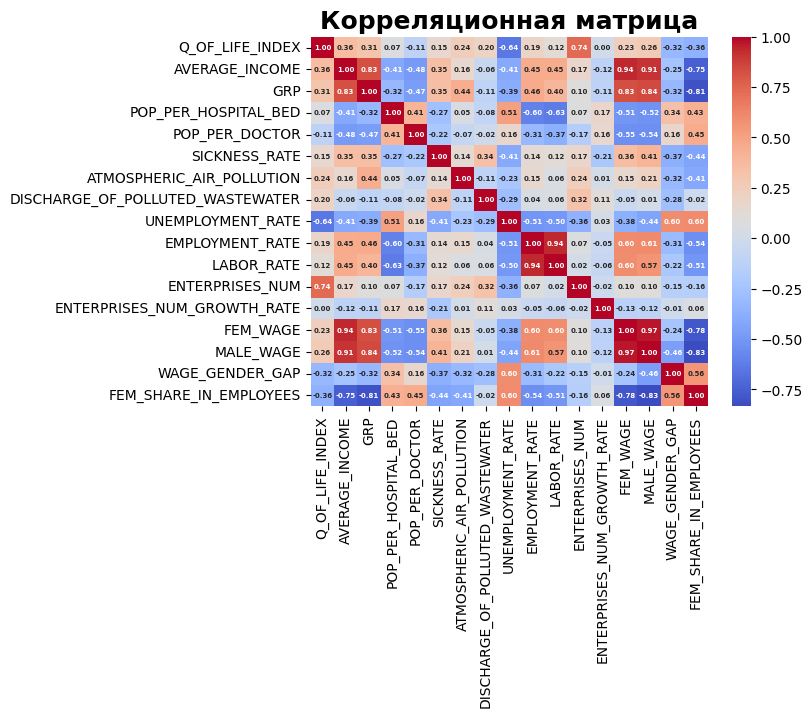

In [39]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'weight': 'bold', 'size': 5})
plt.title('Корреляционная матрица', fontsize=18, fontweight='bold')
plt.show()

Уже по матрице корреляций можно заметить, что тест сферичности скорее будет отвергаться в силу того, что недиагональные элементы отличны от нуля.

In [35]:
print(f'p-value для теста сферичности Бартлетта равен {pg.sphericity(df.select_dtypes(include=['number']))[4]:.4f}')


p-value для теста сферичности Бартлетта равен 0.0000


Можно заметить, что p-value настолько мал, что данный тест **отвергается** при любых уровнях значимости, следовательно, гипотеза о том, что матрица корреляций является единичной, отвергается. Таким образом, `PCA применим в данном случае`.

### **Задание 2:**

`Проведем МГК` и различными методами `определим оптимальное количество ГК`:

In [91]:
scaler = StandardScaler()
df = df.select_dtypes(include=['number'])
scaled_df = scaler.fit_transform(df)
pca = PCA()
pca.fit(scaled_df)
ev = pca.explained_variance_ratio_ # Объясненная дисперсия
eigenvalues = pca.explained_variance_
cv = np.cumsum(ev)
tablica = pd.DataFrame(eigenvalues, columns=['eigenvalues'], index=range(1, 18))
tablica


,eigenvalues
1,7.053315
2,2.288434
3,1.648668
4,1.269765
5,1.165652
6,0.995618
7,0.722144
8,0.621823
9,0.458055
10,0.348441


Здесь даны собственные значения ковариационной матрицы, по которым мы можем судить о важности определенных компонент. По **критерию Кайзера**, который основан на том, что мы берем те ГК, у которых соответствующие айген-значения превышают единицу, нам стоит взять `5-6 главных компонент`, так как они объясняют вариацию как минимум одного из признаков.

In [100]:
tablica2 = pd.DataFrame(ev, columns=['explained ratio'], index=range(1,18))
tablica2

,explained ratio
1,0.408315
2,0.132477
3,0.095441
4,0.073506
5,0.067479
6,0.057636
7,0.041805
8,0.035997
9,0.026517
10,0.020171


Это таблица, в которой можно заметить доли объясненных вариаций (собственное значение, деленное на сумму всех собственных значений). **Можно ориентироваться и на эти показатели, установив определенный уровень отсечения, после которого мы не будем брать ГК**.

Возьмем уровень 10%, то есть мы будем использовать те ГК, которые объясняют как минимум 10% от общего числа вариации. Таким образом, нам стоит взять `2-3 компоненты` в этом случае.

Либо же мы можем использовать иной способ: возьмем те ГК, у которых `суммарная накопленная вариация лежит на уровне, допустим, 80%`:

In [155]:
optimal = np.argmax(cv >= 0.8) + 1
print(f"Оптимальное число компонент: {optimal}")

Оптимальное число компонент: 6


В таком случае, `будем брать 6 ГК`. Проиллюстрируем это на графике:

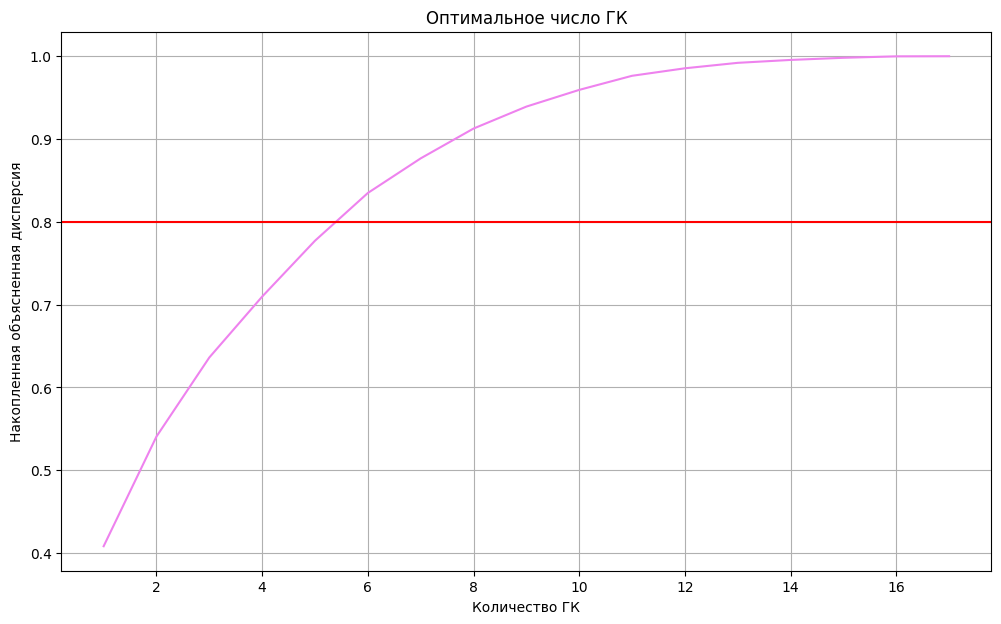

In [104]:
plt.figure(figsize=(12,7))
plt.plot(range(1, len(cv) + 1), cv, color='violet')
plt.xlabel('Количество ГК')
plt.axhline(y=0.8, color='red')
plt.ylabel('Накопленная объясненная дисперсия')
plt.title('Оптимальное число ГК')
plt.grid(True)
plt.show()

Рассмотрим также `метод локтя`:

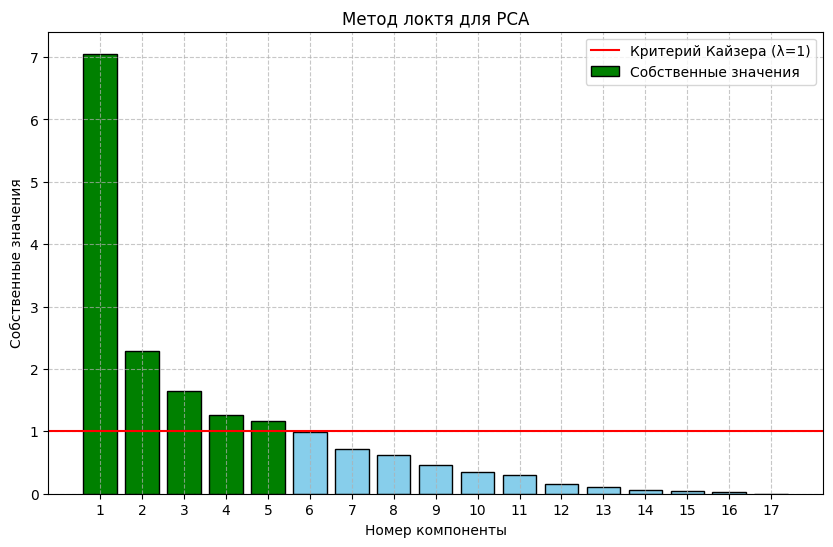

In [88]:
plt.figure(figsize=(10, 6))
colors = ['green' if val >= 1 else 'skyblue' for val in eigenvalues]
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color=colors, edgecolor='black', label='Собственные значения')
plt.axhline(y=1, color='r', linestyle='-', label='Критерий Кайзера (λ=1)')


plt.xlabel('Номер компоненты')
plt.ylabel('Собственные значения')
plt.title('Метод локтя для PCA')
plt.xticks(range(1, 18))
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

По данному методу мы **берем главные компоненты, пока спуск на графике не станет пологим**. Таким образом, нам стоит ориентироваться на, приблизительно, `5 главных компонент` в данном случае.

Мы знаем, что **ГК - линейная комбинация исходных признаков**. `Покажем, с какими коэффициентами признаки входят в главные компоненты`:

In [114]:
components_df = pd.DataFrame(
    pca.components_,
    columns=df.columns,
    index=[f'ГК{i+1}' for i in range(pca.n_components_)])

components_df

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES
ГК1,0.163271,0.322488,0.315659,-0.234470,-0.215591,0.182155,0.121773,0.038481,-0.259732,0.273304,0.262857,0.095942,-0.055322,0.338523,0.352264,-0.203473,-0.339343
ГК2,0.480059,-0.100856,-0.077960,0.196218,0.134241,0.165393,0.193681,0.351769,-0.302290,-0.136448,-0.184603,0.490533,0.094322,-0.186104,-0.123728,-0.253389,-0.020445
ГК3,0.129068,0.236092,0.326863,0.408127,-0.068617,-0.052043,0.341368,-0.384668,0.259634,-0.316958,-0.359357,0.092569,-0.039352,0.144490,0.115856,0.157454,-0.126720
ГК4,-0.194413,0.064855,-0.004587,-0.081688,-0.182931,0.569530,-0.249287,0.287655,0.102304,-0.339605,-0.299311,-0.064076,-0.466975,0.047583,0.069050,-0.061272,0.015602
ГК5,0.311014,0.157625,-0.091334,0.028858,-0.280703,-0.200934,-0.428610,0.033280,0.069180,0.061938,0.129080,0.447479,-0.216649,0.131249,-0.011436,0.484215,0.202457
ГК6,-0.073991,0.190452,0.054375,0.123299,-0.085602,0.032400,-0.320999,0.367754,0.148217,-0.144445,-0.112019,-0.064781,0.758687,0.172662,0.159073,0.041834,-0.037194
ГК7,0.235813,0.243097,0.034145,0.073752,0.703274,0.067171,-0.436238,-0.204778,-0.259735,-0.049769,-0.071761,-0.206862,-0.093288,0.115647,0.073492,0.030832,-0.032205
ГК8,-0.166323,-0.012973,0.107161,0.259413,0.380064,0.350992,0.305770,0.336080,0.191266,0.282736,0.264799,0.069744,-0.049954,0.105015,-0.018974,0.460183,0.046302
ГК9,-0.006603,-0.026621,-0.054353,-0.343597,-0.096081,0.508895,0.071435,-0.432721,-0.274109,-0.104448,-0.034607,0.112145,0.349615,-0.066982,-0.203555,0.385470,0.033477
ГК10,0.145703,-0.201339,-0.100381,0.602962,-0.274057,0.367556,-0.270923,-0.280730,0.056372,0.248234,0.239068,-0.143677,0.041163,-0.096829,-0.024969,-0.194633,-0.100052


Также построим матрицу факторных нагрузок:

In [121]:
A = pca.components_.T * np.sqrt(pca.explained_variance_)
A_df = pd.DataFrame(A, columns=[f'ГК{i}' for i in range(1, pca.n_components_ + 1)], index = df.columns)
print('Матрица факторных нагрузок')
A_df.round(2)

Матрица факторных нагрузок


,ГК1,ГК2,ГК3,ГК4,ГК5,ГК6,ГК7,ГК8,ГК9,ГК10,ГК11,ГК12,ГК13,ГК14,ГК15,ГК16,ГК17
Q_OF_LIFE_INDEX,0.43,0.73,0.17,-0.22,0.34,-0.07,0.20,-0.13,-0.00,0.09,-0.10,0.11,-0.02,0.13,0.03,-0.05,0.00
AVERAGE_INCOME,0.86,-0.15,0.30,0.07,0.17,0.19,0.21,-0.01,-0.02,-0.12,0.03,0.05,-0.13,-0.05,0.11,0.08,0.00
GRP,0.84,-0.12,0.42,-0.01,-0.10,0.05,0.03,0.08,-0.04,-0.06,-0.15,0.10,0.25,-0.05,0.02,-0.02,-0.00
POP_PER_HOSPITAL_BED,-0.62,0.30,0.52,-0.09,0.03,0.12,0.06,0.20,-0.23,0.36,-0.08,-0.02,-0.04,-0.07,-0.03,0.03,-0.00
POP_PER_DOCTOR,-0.57,0.20,-0.09,-0.21,-0.30,-0.09,0.60,0.30,-0.07,-0.16,0.13,-0.03,0.03,-0.00,0.01,-0.02,0.00
SICKNESS_RATE,0.48,0.25,-0.07,0.64,-0.22,0.03,0.06,0.28,0.34,0.22,0.08,0.05,-0.00,0.02,0.02,-0.01,0.00
ATMOSPHERIC_AIR_POLLUTION,0.32,0.29,0.44,-0.28,-0.46,-0.32,-0.37,0.24,0.05,-0.16,-0.03,0.05,-0.10,0.02,-0.01,-0.00,0.00
DISCHARGE_OF_POLLUTED_WASTEWATER,0.10,0.53,-0.49,0.32,0.04,0.37,-0.17,0.27,-0.29,-0.17,-0.15,0.00,-0.01,0.02,0.01,0.00,-0.00
UNEMPLOYMENT_RATE,-0.69,-0.46,0.33,0.12,0.07,0.15,-0.22,0.15,-0.19,0.03,0.23,0.01,0.04,0.09,0.08,-0.04,-0.00
EMPLOYMENT_RATE,0.73,-0.21,-0.41,-0.38,0.07,-0.14,-0.04,0.22,-0.07,0.15,0.09,0.04,0.07,0.08,-0.02,0.10,-0.00


Это **матрица корреляций исходных признаков и главных компонент**. Можно заметить, что, начиная с пятой-шестой главной компоненты, линейные связи становятся несущественными, поэтому `использование большого количества ГК необоснованно`.

### **Задание 3:**

Построим `регрессию на 3 главных компонентах` для признака **AVERAGE_INCOME**:

In [144]:
X = df.loc[:, ~df.columns.isin(['AVERAGE_INCOME'])]
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X)
y = df['AVERAGE_INCOME']
pca3 = PCA(n_components=3)
X_pca = pca3.fit_transform(X_scaled)
model = LinearRegression()
model.fit(X_pca, y)
coeffs = pd.DataFrame({
    'Компонента': ['ГК1', 'ГК2', 'ГК3'],
    'Коэффициент': model.coef_.round(4)})
print(coeffs)
print(f"Свободный член: {model.intercept_:.4f}")

  Компонента  Коэффициент
0        ГК1    3514.4421
1        ГК2    -997.7121
2        ГК3   -2413.7853
Свободный член: 28826.4286


In [148]:
y_pred = model.predict(X_pca)
R2 = r2_score(y, y_pred)
print(f'Коэффициент детерминации модели составляет {R2:.4f}')
mse3 = mean_squared_error(y, y_pred)
print(f'MSE составляет {mse3:.4f}')

Коэффициент детерминации модели составляет 0.7373
MSE составляет 31523884.2369


In [147]:
loadings2 = pca3.components_.T * np.sqrt(pca3.explained_variance_)
loadings_df2 = pd.DataFrame(
    loadings2,
    columns=[f'ГК{i+1}' for i in range(3)],
    index=X.columns
)

print("\nМатрица факторных нагрузок:")
print(loadings_df2.round(2))


Матрица факторных нагрузок:
                                   ГК1   ГК2   ГК3
Q_OF_LIFE_INDEX                   0.44  0.73 -0.11
GRP                               0.81 -0.11 -0.46
POP_PER_HOSPITAL_BED             -0.64  0.35 -0.47
POP_PER_DOCTOR                   -0.57  0.21  0.11
SICKNESS_RATE                     0.49  0.23  0.08
ATMOSPHERIC_AIR_POLLUTION         0.34  0.29 -0.55
DISCHARGE_OF_POLLUTED_WASTEWATER  0.13  0.50  0.56
UNEMPLOYMENT_RATE                -0.72 -0.41 -0.31
EMPLOYMENT_RATE                   0.75 -0.26  0.32
LABOR_RATE                        0.72 -0.33  0.38
ENTERPRISES_NUM                   0.26  0.75 -0.05
ENTERPRISES_NUM_GROWTH_RATE      -0.15  0.15  0.06
FEM_WAGE                          0.86 -0.28 -0.19
MALE_WAGE                         0.91 -0.19 -0.17
WAGE_GENDER_GAP                  -0.57 -0.34 -0.14
FEM_SHARE_IN_EMPLOYEES           -0.90 -0.01  0.22


Таким образом, назовем наши ГК:
ГК1 - экономические показатели (ключевые признаки: зарплаты, ВВП, безработица)
ГК2 - активность промышленной отрасли (ключевые признаки: количество предприятий, выбросы в атмосферу и воду)
ГК3 - экология и здоровье (сброс загрязненных вод, загрязнение воздуха, общие показатели врачебной занятости и здоровья)

Можно заметить, что `наша модель объясняет примерно 74 процента общей доли вариации целевой переменной`, что является неплохим результатом, учитывая, что мы избавились от очень большого числа признаков. Однако `MSE является довольно большим`, но это так в силу оптимизации модели.

### **Задание 4:**

Построим `регрессию на исходных признаках` для целевой переменной **AVERAGE_INCOME**:

In [154]:
model_base = LinearRegression()
model_base.fit(X_scaled, y)
y_base_pred = model_base.predict(X_scaled)
r2_base = r2_score(y, y_base_pred)
mse_base = mean_squared_error(y, y_base_pred)
coeffs = pd.DataFrame({
    'Компонента': X.columns,
    'Коэффициент': model_base.coef_.round(4)})
print(coeffs)
print(f"Свободный член: {model_base.intercept_:.4f}")
print(f'\nКоэффициент детерминации модели составляет {r2_base:.4f}')
print(f'MSE составляет {mse_base:.4f}')

                          Компонента  Коэффициент
0                    Q_OF_LIFE_INDEX    2337.1213
1                                GRP    1391.8475
2               POP_PER_HOSPITAL_BED    -955.3753
3                     POP_PER_DOCTOR     746.1967
4                      SICKNESS_RATE     -34.3223
5          ATMOSPHERIC_AIR_POLLUTION    -366.3690
6   DISCHARGE_OF_POLLUTED_WASTEWATER    -476.4975
7                  UNEMPLOYMENT_RATE     362.4909
8                    EMPLOYMENT_RATE   -3512.4567
9                         LABOR_RATE    1386.6046
10                   ENTERPRISES_NUM    -106.9074
11       ENTERPRISES_NUM_GROWTH_RATE     173.1695
12                          FEM_WAGE    8933.2063
13                         MALE_WAGE    1289.2610
14                   WAGE_GENDER_GAP      20.1347
15            FEM_SHARE_IN_EMPLOYEES     237.2566
Свободный член: 28826.4286

Коэффициент детерминации модели составляет 0.9341
MSE составляет 7907026.8034


Построив регрессию на исходных данных, можно заметить, что `модель объясняет 93 процента вариации` исходного целевого признака **AVERAGE_INCOME**, что лучше, чем результат в PCA, `MSE также меньше` в силу того, что мы использовали все признаки.
Но это может признаком того, что модель переобучена: она очень сильно нагружена по сравненению с PCA на 3 ГК. Также она является сильно нагруженной. Заметим, что мы `использовали только 3 главных компонента вместо 16 признаков`, и это `не привело к слишком существенному падению качества модели`.
Таким образом, **стоит добавить некоторое количество ГК**, чтобы модель смогла описывать целевую переменную более точно, но, как мы выяснили, 3 главные компоненты тоже дают **неплохие результаты**.